In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [19]:
data = pd.read_csv('Sleep_health_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Gender, Occupation, BMI category, Blood Pressure, Sleep Disorder are non-integer features. These need to be converted or encoded.

In [21]:
df = data.drop('Person ID', axis=1)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [22]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [23]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [24]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [26]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

normal and normal weight are the same. so these can be merged.

In [27]:
to_combine = ['Normal', 'Normal Weight']
df['BMI Category'] = df['BMI Category'].replace(to_combine, 'Normal')

In [28]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

Blood Pressure needs to be split into upper and lower values. These are non-integer features, so, convert them to integers.

In [29]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,0,1
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [30]:
# renaming as lower_bp and upper_bp
df = df.rename(columns={0: 'bp_upper', 1: 'bp_lower'})
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [31]:
# convert to int
df['bp_upper'] = df['bp_upper'].astype('int')
df['bp_lower'] = df['bp_lower'].astype('int')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  bp_upper                 374 non-null    int32  
 12  bp_lower                 374 non-null    int32  
dtypes: float64(1), int32(2), int64(6), object(4)
memory usage: 35.2+ KB


In [33]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


# Exploratory Data Analysis

For target variable:

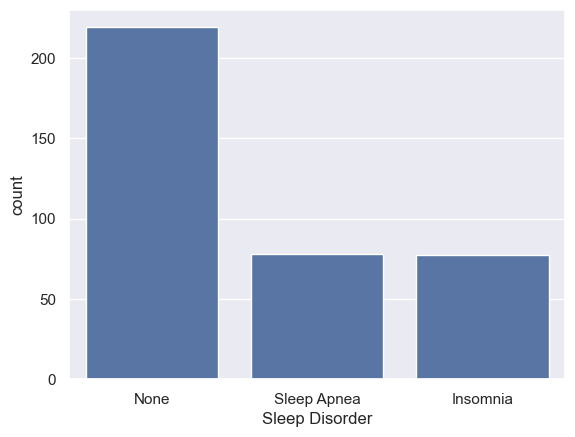

In [34]:
sns.countplot(x='Sleep Disorder', data=df)
plt.show()

Group the two sleep disorders.

In [35]:
to_combine = ['Sleep Apnea', 'Insomnia']
df['Sleep Disorder'] = df['Sleep Disorder'].replace(to_combine, 'Sleep Disorder')

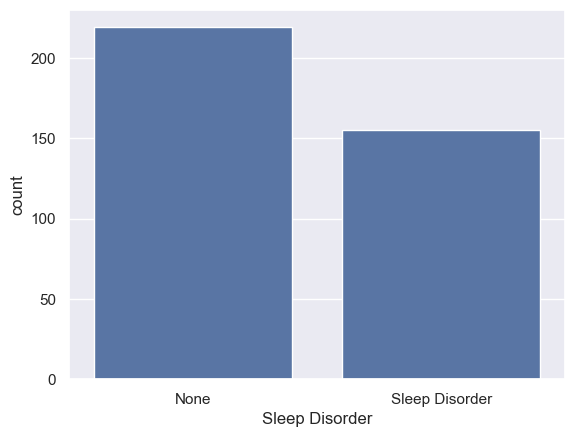

In [36]:
sns.countplot(x='Sleep Disorder', data=df)
plt.show()

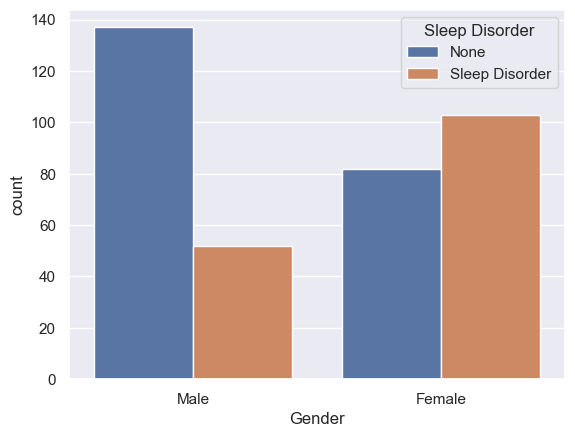

In [37]:
sns.countplot(x='Gender', data = df, hue='Sleep Disorder')
plt.show()

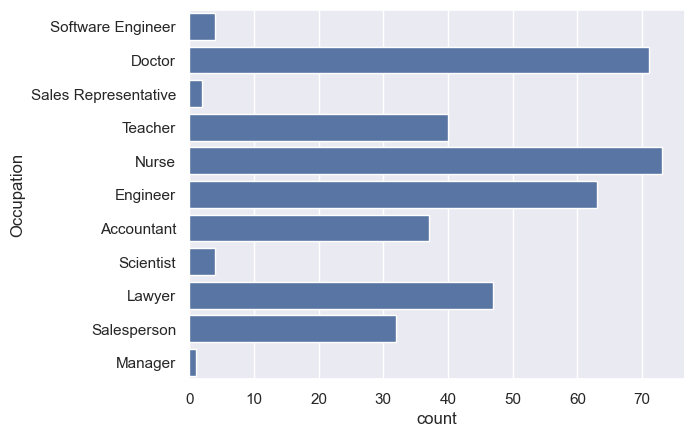

In [38]:
sns.countplot(y='Occupation', data = df)
plt.show()

In [39]:
to_combine = ['Software Engineer', 'Sales Representative', 'Scientist', 'Manager']
df['Occupation'] = df['Occupation'].replace(to_combine, 'Other')

In [40]:
df['Occupation'].unique()

array(['Other', 'Doctor', 'Teacher', 'Nurse', 'Engineer', 'Accountant',
       'Lawyer', 'Salesperson'], dtype=object)

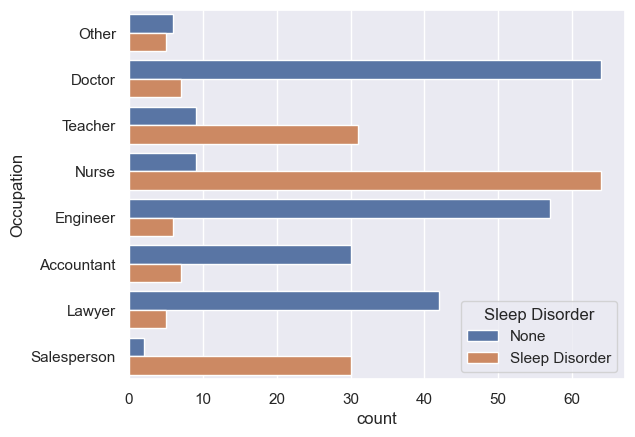

In [41]:
sns.countplot(y='Occupation', data = df, hue = 'Sleep Disorder')
plt.show()

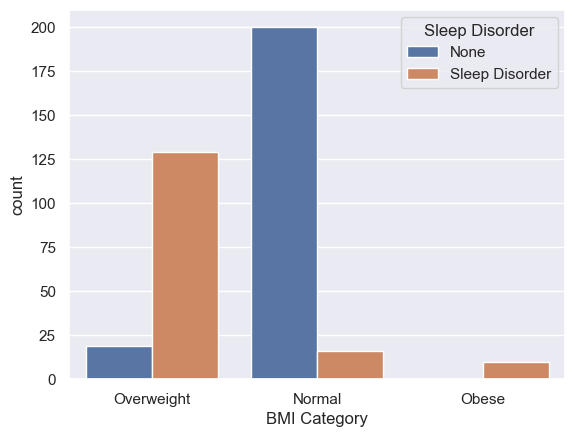

In [42]:
sns.countplot(x='BMI Category', data = df, hue='Sleep Disorder')
plt.show()

All Obese people and most of the Overweight people have a sleeping disorder.  

In [43]:
df['Occupation'].unique()

array(['Other', 'Doctor', 'Teacher', 'Nurse', 'Engineer', 'Accountant',
       'Lawyer', 'Salesperson'], dtype=object)

# Label Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [46]:
df_transformed = df.copy()
df_transformed.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower
0,Male,27,Other,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Disorder,140,90
4,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Disorder,140,90


In [47]:
df_transformed['Gender'] = enc.fit_transform(df['Gender'])
df_transformed

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower
0,1,27,Other,6.1,6,42,6,Overweight,77,4200,None,126,83
1,1,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,1,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,1,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Disorder,140,90
4,1,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Disorder,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Disorder,140,95
370,0,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Disorder,140,95
371,0,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Disorder,140,95
372,0,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Disorder,140,95


In [48]:
df_transformed['Occupation'] = enc.fit_transform(df['Occupation'])
df_transformed['BMI Category'] = enc.fit_transform(df['BMI Category'])
df_transformed['Sleep Disorder'] = enc.fit_transform(df['Sleep Disorder'])
df_transformed

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower
0,1,27,5,6.1,6,42,6,2,77,4200,0,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
3,1,28,5,5.9,4,30,8,1,85,3000,1,140,90
4,1,28,5,5.9,4,30,8,1,85,3000,1,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,4,8.1,9,75,3,2,68,7000,1,140,95
370,0,59,4,8.0,9,75,3,2,68,7000,1,140,95
371,0,59,4,8.1,9,75,3,2,68,7000,1,140,95
372,0,59,4,8.1,9,75,3,2,68,7000,1,140,95


In [49]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int32  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int32  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int32  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int32  
 11  bp_upper                 374 non-null    int32  
 12  bp_lower                 374 non-null    int32  
dtypes: float64(1), int32(6), int64(6)
memory usage: 29.3 KB


# Model

In [50]:
df_transformed.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'bp_upper', 'bp_lower'],
      dtype='object')

In [51]:
inputs = df_transformed[['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'bp_upper', 'bp_lower']]

In [52]:
target = df_transformed['Sleep Disorder']

# Train and Test split

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.3, random_state=10)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train, y_train)

In [ ]:
log_pred = reg.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
c = confusion_matrix(y_test, log_pred)
c

In [ ]:
print('accuracy:',accuracy_score(y_test, log_pred))
print('precision:',precision_score(y_test,log_pred))
print('recall:',recall_score(y_test, log_pred))
print('F1-score:', f1_score(y_test, log_pred))

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel="linear", gamma='scale', C=1.0) # model defining
svm.fit(x_train,y_train) # fit to our train data

In [ ]:
svm_pred = svm.predict(x_test)

In [ ]:
c_svm = confusion_matrix(y_test, svm_pred)
c_svm

In [ ]:
print('accuracy:',accuracy_score(y_test, svm_pred))
print('precision:',precision_score(y_test,svm_pred))
print('recall:',recall_score(y_test, svm_pred))
print('F1-score:', f1_score(y_test, svm_pred))

# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

In [ ]:
gnb_pred = gnb.predict(x_test)

In [ ]:
confusion_matrix(y_test, gnb_pred)

In [ ]:
print('accuracy:',accuracy_score(y_test, gnb_pred))
print('precision:',precision_score(y_test,gnb_pred))
print('recall:',recall_score(y_test, gnb_pred))
print('F1-score:', f1_score(y_test, gnb_pred))

In [ ]:
print(classification_report(y_test, gnb_pred))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train) 

In [ ]:
rf_pred = rf.predict(x_test)

In [ ]:
confusion_matrix(y_test, rf_pred)

In [ ]:
print('accuracy:',accuracy_score(y_test, rf_pred))
print('precision:',precision_score(y_test,rf_pred))
print('recall:',recall_score(y_test, rf_pred))
print('F1-score:', f1_score(y_test, rf_pred))

# AdaBoost 

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [57]:
adb_pred = adb.predict(x_test)

In [58]:
confusion_matrix(y_test, adb_pred)

array([[66,  5],
       [ 3, 39]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [61]:
print('accuracy:',accuracy_score(y_test, adb_pred))
print('precision:',precision_score(y_test,adb_pred))
print('recall:',recall_score(y_test, adb_pred))
print('F1-score:', f1_score(y_test, adb_pred))

accuracy: 0.9292035398230089
precision: 0.8863636363636364
recall: 0.9285714285714286
F1-score: 0.9069767441860465


# Testing with custom input

In [62]:
input_data = (0, 35, 2, 7.0, 8, 65, 5, 2, 73, 3000, 140, 90)

input_data_as_np_array = np.asarray(input_data) # converting the input data into a numpy array

input_data_reshaped = input_data_as_np_array.reshape(1,-1) # reshape array as we are predicting only for 1 instance

prediction = adb.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('the person is not at a risk of sleep disorder')
else:
    print('the person is at a risk of sleep disorder')

[1]
the person is at a risk of sleep disorder


c:\Users\Vatsu.Daita\.conda\envs\py3115\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


# Saving the trained AdaBoost Model

In [63]:
import pickle

In [64]:
filename = 'trained_adb_model.sav' # .sav is short for saved file. It is a data storage format used in computer applications.

pickle.dump(adb, open(filename, 'wb')) # saving our SVM model (i.e svm) in filename by writing in binary

# Loading the model and testing

In [65]:
loaded_model = pickle.load(open('trained_adb_model.sav', 'rb')) # 'rb' means reading the binary format


In [66]:
# testing our loaded model
input_data = (0, 35, 2, 7.0, 8, 65, 5, 2, 73, 3000, 140, 90)

input_data_as_np_array = np.asarray(input_data) 

input_data_reshaped = input_data_as_np_array.reshape(1,-1) 

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('the person is not at a risk of sleep disorder')
else:
    print('the person is at a risk of sleep disorder')

[1]
the person is at a risk of sleep disorder


c:\Users\Vatsu.Daita\.conda\envs\py3115\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
